In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
elastic_net = pd.read_csv("./metrics/001_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/001_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/001_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/001_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/001_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/001_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/001_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/001_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.913182,1.727339,14.203959,3.768814,0.023677,6.775036,0.203156
0,Decision Tree,0.855916,1.732576,23.573060,4.855210,0.024202,0.107992,0.003676
0,XGBoost,0.844277,2.944647,25.477327,5.047507,0.039775,0.614766,0.006643
0,MLP,0.678488,4.697368,52.601433,7.252685,0.063783,44.920419,0.008268
0,Linear Regression,0.326866,7.946688,110.129074,10.494240,0.107932,0.021839,0.003812
0,Lasso,0.292887,8.025448,115.688310,10.755850,0.110912,0.014949,0.002579
0,Elastic Net,0.266358,8.351267,120.028610,10.955757,0.116191,0.014368,0.002530
0,Logistic Regression,-0.276799,6.965119,208.892500,14.453114,0.115319,8.341026,0.008929


In [6]:
metrics.to_csv("./metrics/002_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


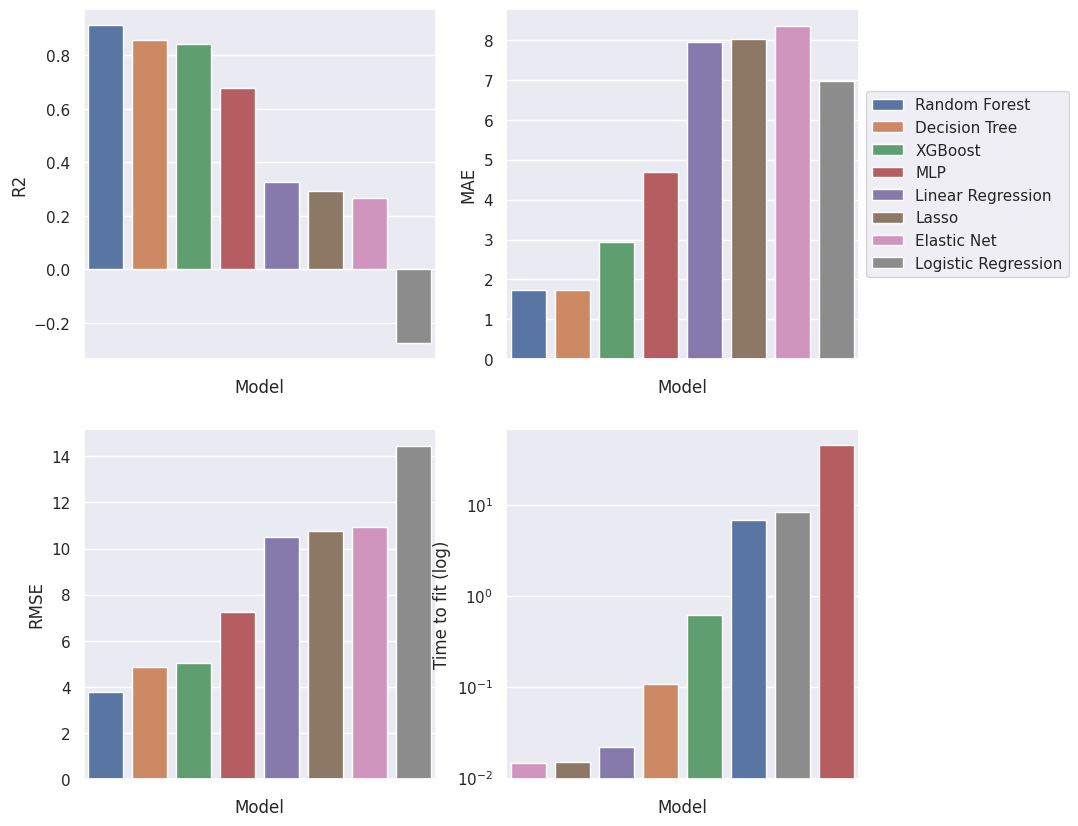

In [9]:
ttf_order = list(metrics.sort_values(by="time_to_fit")["model"])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False,order=ttf_order)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/002_gardiner_flow_only_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/002_gardiner_flow_only_metrics.png",bbox_inches="tight")
plt.savefig("./plots/002_gardiner_flow_only_metrics.pdf",bbox_inches="tight")